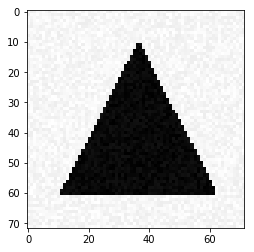

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.callbacks import History 


def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]



In [172]:
def generate_a_drawing_pair(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_free = imdata
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata, imdata_free

def generate_a_rectangle_pair(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_pair(figsize, U, V, noise)


def generate_a_disk_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_pair(figsize, U, V, noise)

def generate_a_triangle_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_pair(figsize, U, V, noise)
    return imdata

def generate_dataset_hourglass(nb_samples, noise=20.0, free_location=False):
    # Getting im_size:
    im = generate_a_rectangle_pair()
    im_size = im[0].shape[0]
    X_noise = np.zeros([nb_samples,im_size])
    X = np.zeros([nb_samples,im_size])

    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X_noise[i], X[i] = generate_a_rectangle_pair(noise, free_location)
            X_noise[i], X[i] = X_noise[i], X[i]
        elif category == 1: 
            X_noise[i], X[i] = generate_a_disk_pair(noise, free_location)
            X_noise[i], X[i] = X_noise[i], X[i]
        else:
            X_noise[i], X[i] = generate_a_triangle_pair(noise, free_location)
            X_noise[i], X[i] = X_noise[i], X[i]

    return np.array([X_noise, X])

# Partie 1 - Simple classification

In [173]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [174]:
X_train[0]

array([0.96416622, 0.98420506, 0.98926938, ..., 0.96902151, 0.96912942,
       0.96831772])

In [175]:
Y_train = np_utils.to_categorical(Y_train,3)
X_train, Y_train

(array([[0.96416622, 0.98420506, 0.98926938, ..., 0.96902151, 0.96912942,
         0.96831772],
        [0.96019324, 0.94555967, 0.9911471 , ..., 0.97051275, 0.96157633,
         0.9929543 ],
        [0.98627202, 0.9882423 , 0.95224547, ..., 0.9505958 , 0.93809417,
         0.99853111],
        ...,
        [0.9545301 , 0.95988662, 0.9657558 , ..., 0.94022849, 0.95405312,
         0.95491133],
        [0.95117665, 0.95641868, 0.93792196, ..., 0.98250897, 0.98804041,
         0.94404927],
        [0.98065347, 0.93380513, 0.99949127, ..., 0.97960188, 0.97646126,
         0.99182745]]), array([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0

In [176]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])/255
X_train.shape

(300, 5184)

In [177]:
from keras.models import Sequential 
from keras import utils
model = Sequential()

from keras.layers import Dense, Activation, Flatten

model.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam)


model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 1.0955
Epoch 2/100
300/300 [==============================] - 0s 152us/step - loss: 1.0879
Epoch 3/100
300/300 [==============================] - 0s 144us/step - loss: 1.0807
Epoch 4/100
300/300 [==============================] - 0s 137us/step - loss: 1.0759
Epoch 5/100
300/300 [==============================] - 0s 158us/step - loss: 1.0693
Epoch 6/100
300/300 [==============================] - 0s 150us/step - loss: 1.0632
Epoch 7/100
300/300 [==============================] - 0s 158us/step - loss: 1.0568
Epoch 8/100
300/300 [==============================] - 0s 157us/step - loss: 1.0526
Epoch 9/100
300/300 [==============================] - 0s 155us/step - loss: 1.0454
Epoch 10/100
300/300 [==============================] - 0s 155us/step - loss: 1.0394
Epoch 11/100
300/300 [==============================] - 0s 151us/step - loss: 1.0336
Epoch 12/100
300/300 [==============================] - 0s 149us/step - loss

In [178]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [179]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])/255
model.predict(X_test)

array([[1.5493067e-33, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

# Partie 2 - Visualization of the solution

In [180]:
weights = model.get_weights()
weightMat = np.asarray(weights[0])

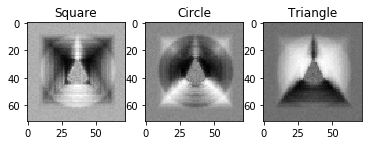

In [181]:
plt.figure();
plt.subplot(1, 3, 1)
plt.imshow(weightMat[:,0].reshape(72,72),cmap='gray')
plt.title('Square')
plt.subplot(1, 3, 2)
plt.imshow(weightMat[:,1].reshape(72,72),cmap='gray')
plt.title('Circle')

plt.subplot(1, 3, 3)
plt.imshow(weightMat[:,2].reshape(72,72), cmap='gray')
plt.title('Triangle')

plt.savefig('figures/part2_features')

plt.show()

# Partie 3 - A More Difficult Classification Problem

In [182]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = utils.np_utils.to_categorical(Y_train,3)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## Classifieur linéaire

In [183]:
from keras.models import Sequential 
from keras import utils
model2 = Sequential()

from keras.layers import Dense, Activation, Flatten

history3 = History()


model2.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model2.fit(X_train, Y_train, epochs=40, batch_size=32, validation_data = (X_test, Y_test), callbacks=[history3])

Train on 300 samples, validate on 300 samples
Epoch 1/40
300/300 [==============================] - 1s 4ms/step - loss: 1.0977 - acc: 0.3233 - val_loss: 9.9584 - val_acc: 0.3300
Epoch 2/40
300/300 [==============================] - 0s 256us/step - loss: 1.0901 - acc: 0.3700 - val_loss: 10.7991 - val_acc: 0.3300
Epoch 3/40
300/300 [==============================] - 0s 284us/step - loss: 1.0890 - acc: 0.3700 - val_loss: 10.7991 - val_acc: 0.3300
Epoch 4/40
300/300 [==============================] - 0s 292us/step - loss: 1.0871 - acc: 0.3700 - val_loss: 10.7991 - val_acc: 0.3300
Epoch 5/40
300/300 [==============================] - 0s 273us/step - loss: 1.0865 - acc: 0.3700 - val_loss: 10.7662 - val_acc: 0.3300
Epoch 6/40
300/300 [==============================] - 0s 291us/step - loss: 1.0854 - acc: 0.3700 - val_loss: 10.7879 - val_acc: 0.3300
Epoch 7/40
300/300 [==============================] - 0s 279us/step - loss: 1.0838 - acc: 0.3700 - val_loss: 10.7403 - val_acc: 0.3300
Epoch 8/40
3

In [184]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [185]:
evaluation = model2.evaluate(X_test, Y_test)
evaluation

300/300 [==============================] - 0s 76us/step


[1.0617864147822063, 0.4033333333333333]

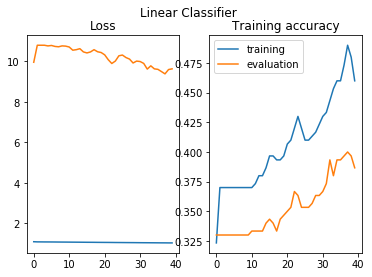

In [186]:
plt.figure(); plt.suptitle('Linear Classifier');
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_linear')
plt.show()

In [187]:
history3.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## CNN

In [188]:
X_train.shape
X_train.reshape(X_train.shape[0],72,72,1)

array([[[[0.93789568],
         [0.9811007 ],
         [0.94200083],
         ...,
         [0.949573  ],
         [0.96213242],
         [0.97045545]],

        [[0.96265946],
         [0.99964912],
         [0.95281925],
         ...,
         [0.96475183],
         [0.98911356],
         [0.94763332]],

        [[0.93314739],
         [0.93273062],
         [0.98678126],
         ...,
         [0.96293431],
         [0.94107453],
         [0.97821672]],

        ...,

        [[0.99124593],
         [0.9450425 ],
         [0.99726299],
         ...,
         [0.98271575],
         [0.94279784],
         [0.96512412]],

        [[0.9924946 ],
         [0.9405395 ],
         [0.93294701],
         ...,
         [0.95512648],
         [0.98017346],
         [0.93258486]],

        [[0.9827266 ],
         [0.94967815],
         [0.96473871],
         ...,
         [0.98748057],
         [0.9481736 ],
         [0.99558476]]],


       [[[0.94968167],
         [0.96398443],
         [0.93

In [189]:
from keras.models import Sequential 
from keras import utils
model3 = Sequential()

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
history = History()

model3.add(Conv2D(16, (5,5), input_shape=(72,72,1)   )    )
model3.add( MaxPooling2D() )
model3.add(Flatten())
model3.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model3.fit(X_train.reshape(X_train.shape[0],72,72,1), Y_train, epochs=25, batch_size=32,  callbacks=[history], validation_data = (X_test.reshape(X_test.shape[0],72,72,1), Y_test),)

Train on 300 samples, validate on 300 samples
Epoch 1/25
300/300 [==============================] - 1s 4ms/step - loss: 1.1012 - acc: 0.3033 - val_loss: 1.7757 - val_acc: 0.3433
Epoch 2/25
300/300 [==============================] - 0s 474us/step - loss: 1.0946 - acc: 0.3767 - val_loss: 3.6765 - val_acc: 0.3333
Epoch 3/25
300/300 [==============================] - 0s 500us/step - loss: 1.0955 - acc: 0.3700 - val_loss: 4.0871 - val_acc: 0.3433
Epoch 4/25
300/300 [==============================] - 0s 507us/step - loss: 1.0906 - acc: 0.3700 - val_loss: 5.7316 - val_acc: 0.3600
Epoch 5/25
300/300 [==============================] - 0s 497us/step - loss: 1.0888 - acc: 0.3700 - val_loss: 7.2239 - val_acc: 0.3400
Epoch 6/25
300/300 [==============================] - 0s 500us/step - loss: 1.0817 - acc: 0.4267 - val_loss: 10.7985 - val_acc: 0.3300
Epoch 7/25
300/300 [==============================] - 0s 504us/step - loss: 1.0728 - acc: 0.3933 - val_loss: 10.7991 - val_acc: 0.3300
Epoch 8/25
300/3

In [190]:
[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape(X_test.shape[0],72,72,1)
evaluation = model3.evaluate(X_test, Y_test)
evaluation

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 140us/step


[10.799123878479003, 0.3299999996026357]

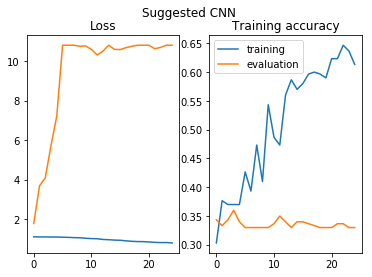

In [191]:
plt.figure(); plt.suptitle('Suggested CNN');
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_cnn')
plt.show()

## Big Fat CNN

In [195]:
fat = Sequential()

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
history2 = History()

fat.add(Conv2D(48, (12,12), input_shape=(72,72,1) , activation='relu' )    )
fat.add(Conv2D(96, (5,5), activation='relu'  )    )
fat.add( MaxPooling2D() ) 

fat.add(Flatten())
fat.add(Dense(96, activation='relu'))

fat.add(Dense(3,  activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
fat.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


fat.fit(X_train.reshape(X_train.shape[0],72,72,1), Y_train, epochs=25, batch_size=128,  callbacks=[history2])


Epoch 1/25
300/300 [==============================] - 3s 11ms/step - loss: 3.6010 - acc: 0.3567
Epoch 2/25
300/300 [==============================] - 0s 1ms/step - loss: 1.1363 - acc: 0.4133
Epoch 3/25
300/300 [==============================] - 0s 1ms/step - loss: 1.2631 - acc: 0.3100
Epoch 4/25
300/300 [==============================] - 0s 1ms/step - loss: 1.0587 - acc: 0.3733
Epoch 5/25
300/300 [==============================] - 0s 1ms/step - loss: 0.8716 - acc: 0.6367
Epoch 6/25
300/300 [==============================] - 0s 1ms/step - loss: 0.7856 - acc: 0.6900
Epoch 7/25
300/300 [==============================] - 0s 1ms/step - loss: 0.6919 - acc: 0.6800
Epoch 8/25
300/300 [==============================] - 0s 1ms/step - loss: 0.6478 - acc: 0.7033
Epoch 9/25
300/300 [==============================] - 0s 1ms/step - loss: 0.5974 - acc: 0.7533
Epoch 10/25
300/300 [==============================] - 0s 1ms/step - loss: 0.5536 - acc: 0.7367
Epoch 11/25
300/300 [===========================

In [196]:
fat.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


[1.8344249391555787, 0.6500000007947286]

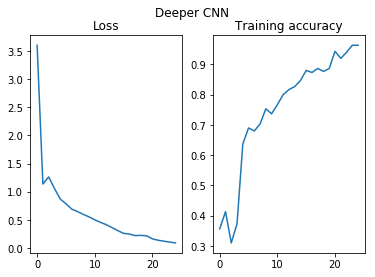

In [197]:
plt.figure(); plt.suptitle('Deeper CNN');
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history2.history['acc'])
plt.title('Training accuracy')
plt.savefig('figures/part3_deeper_cnn')
plt.show()

# Partie 4 - Regression

In [210]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


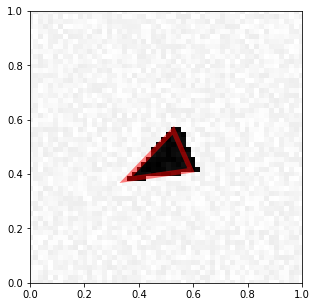

In [211]:
visualize_prediction(X_train[1], Y_train[1])

In [317]:
X_train = X_train.reshape(X_train.shape[0],72,72,1)

X_train.shape

(300, 72, 72, 1)

In [209]:
X_train.shape[0]


300

In [318]:
from keras.models import Sequential 
from keras import utils
model4 = Sequential()

from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

model4.add(Conv2D(32, (3,3), input_shape=(72,72,1)   )    )
model4.add(Dropout(0.3))
model4.add( BatchNormalization() )

model4.add( MaxPooling2D() )

model4.add(Conv2D(32, (3,3), )    )
model4.add(Dropout(0.3))
model4.add( MaxPooling2D() )

model4.add(Conv2D(32, (3,3), )    )
model4.add(Dropout(0.3))
model4.add( MaxPooling2D() )
model4.add( BatchNormalization() )

model4.add(Flatten())
#model4.add(Dense(128, activation = 'linear'))

#model4.add(Dense(6, activation = 'sigmoid'))
model4.add(Dense(6, activation = 'tanh'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model4.compile(loss='mean_squared_error', optimizer='adam')


model4.fit(X_train, Y_train, shuffle = True, epochs=500, batch_size=128)

Epoch 1/500
300/300 [==============================] - 3s 10ms/step - loss: 0.8055
Epoch 2/500
300/300 [==============================] - 0s 665us/step - loss: 0.4992
Epoch 3/500
300/300 [==============================] - 0s 666us/step - loss: 0.3797
Epoch 4/500
300/300 [==============================] - 0s 665us/step - loss: 0.3328
Epoch 5/500
300/300 [==============================] - 0s 661us/step - loss: 0.3071
Epoch 6/500
300/300 [==============================] - 0s 662us/step - loss: 0.2886
Epoch 7/500
300/300 [==============================] - 0s 665us/step - loss: 0.2931
Epoch 8/500
300/300 [==============================] - 0s 662us/step - loss: 0.2866
Epoch 9/500
300/300 [==============================] - 0s 657us/step - loss: 0.2809
Epoch 10/500
300/300 [==============================] - 0s 666us/step - loss: 0.2673
Epoch 11/500
300/300 [==============================] - 0s 658us/step - loss: 0.2621
Epoch 12/500
300/300 [==============================] - 0s 656us/step - los

300/300 [==============================] - 0s 665us/step - loss: 0.0437
Epoch 193/500
300/300 [==============================] - 0s 662us/step - loss: 0.0448
Epoch 194/500
300/300 [==============================] - 0s 663us/step - loss: 0.0431
Epoch 195/500
300/300 [==============================] - 0s 661us/step - loss: 0.0444
Epoch 196/500
300/300 [==============================] - 0s 660us/step - loss: 0.0422
Epoch 197/500
300/300 [==============================] - 0s 660us/step - loss: 0.0416
Epoch 198/500
300/300 [==============================] - 0s 663us/step - loss: 0.0414
Epoch 199/500
300/300 [==============================] - 0s 668us/step - loss: 0.0405
Epoch 200/500
300/300 [==============================] - 0s 664us/step - loss: 0.0416
Epoch 201/500
300/300 [==============================] - 0s 656us/step - loss: 0.0416
Epoch 202/500
300/300 [==============================] - 0s 661us/step - loss: 0.0436
Epoch 203/500
300/300 [==============================] - 0s 661us/st

300/300 [==============================] - 0s 661us/step - loss: 0.0258
Epoch 383/500
300/300 [==============================] - 0s 662us/step - loss: 0.0247
Epoch 384/500
300/300 [==============================] - 0s 662us/step - loss: 0.0251
Epoch 385/500
300/300 [==============================] - 0s 660us/step - loss: 0.0233
Epoch 386/500
300/300 [==============================] - 0s 660us/step - loss: 0.0238
Epoch 387/500
300/300 [==============================] - 0s 661us/step - loss: 0.0248
Epoch 388/500
300/300 [==============================] - 0s 661us/step - loss: 0.0242
Epoch 389/500
300/300 [==============================] - 0s 662us/step - loss: 0.0233
Epoch 390/500
300/300 [==============================] - 0s 662us/step - loss: 0.0228
Epoch 391/500
300/300 [==============================] - 0s 661us/step - loss: 0.0235
Epoch 392/500
300/300 [==============================] - 0s 660us/step - loss: 0.0227
Epoch 393/500
300/300 [==============================] - 0s 659us/st

In [297]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 70, 70, 32)        320       
_________________________________________________________________
dropout_64 (Dropout)         (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 33, 33, 32)        9248      
_________________________________________________________________
dropout_65 (Dropout)         (None, 33, 33, 32)        0         
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 16, 16, 32)        0         
__________

In [304]:
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0],72,72,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [321]:
Y_test = model4.predict(X_test)
Y_test2 = model4.predict(X_train)

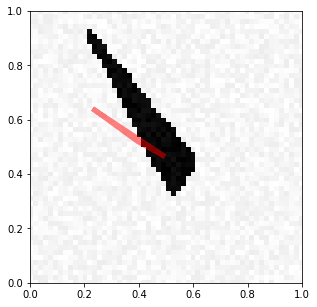

In [322]:
i=20
visualize_prediction(X_train[i], (Y_test2[i]))

In [230]:
Y_test2[0]

array([0.4594086 , 0.34345484, 0.8699073 , 1.3850417 , 0.40236348,
       0.8355117 ], dtype=float32)

In [231]:
Y_train.shape

(300, 6)

In [232]:
Y_test[0]

array([ 94.32881 ,  44.472553,  44.397865, -33.60069 ,  71.697586,
        67.46197 ], dtype=float32)

In [233]:
Y_train[0]

array([0.44196469, 0.24568865, 0.86742137, 0.98804275, 0.03924421,
       0.64284099])

In [234]:
np_utils.to_categorical(Y_train[3], 3) 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# Bonus question

In [266]:
XX_train, XX_true = generate_dataset_hourglass(300,100,True)

XX_test, XX_test_true = generate_dataset_hourglass(300,100,True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [267]:
XX_train = np.clip(XX_train.reshape(XX_train.shape[0],72,72,1)/255,0,1)
XX_true = XX_true.reshape(XX_test.shape[0],72,72,1)/255
XX_test = np.clip(XX_test.reshape(XX_test.shape[0],72,72,1)/255,0,1)
XX_test_true = XX_test.reshape(XX_test_true.shape[0],72,72,1)/255

In [295]:
autoencoder = Sequential()
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.callbacks import History 
history5 = History()
input_img = (72, 72, 1)
neurons = 32
autoencoder.add( Conv2D(neurons, (3, 3), input_shape = input_img, activation='relu', padding='same'))

autoencoder.add( MaxPooling2D((2, 2)))
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )

autoencoder.add(MaxPooling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )

autoencoder.add(MaxPooling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )
autoencoder.add( BatchNormalization())

autoencoder.add( UpSampling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )
autoencoder.add( UpSampling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )
autoencoder.add( UpSampling2D((2, 2)) )
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same') )

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(XX_train, XX_true,epochs=100,batch_size=128, shuffle = True,callbacks=[history5], validation_data = (XX_test,XX_test_true) ) 

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 5s 15ms/step - loss: 0.5196 - val_loss: 6.5880
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1959 - val_loss: 5.8967
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1039 - val_loss: 13.1018
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0593 - val_loss: 14.7483
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0503 - val_loss: 14.6161
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0405 - val_loss: 14.7754
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0340 - val_loss: 14.5637
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0280 - val_loss: 14.3312
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0250 - val_loss: 14.0936
Epoch 10/100
300/300 [===============

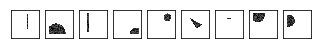

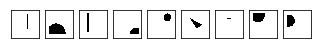

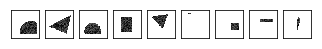

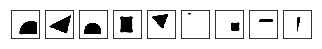

In [296]:
XX_predict = autoencoder.predict(XX_test)
n = 10
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(XX_train[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(XX_true[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


for i in range(1,n):
    ax = plt.subplot(3, n, i)
    plt.imshow(XX_test[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
for i in range(1,n):
    ax = plt.subplot(4, n, i)
    plt.imshow(XX_predict[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

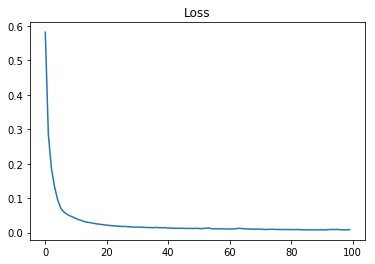

In [270]:
plt.figure();
plt.plot(history5.history['loss'])
plt.title('Loss')


plt.savefig('figures/part6_cnn')
plt.show()

In [271]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_252 (Conv2D)          (None, 72, 72, 32)        320       
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 9, 9, 32)          9248      
__________